### Assignment 2 requirement
1) Describe: tell us about the data that you have. We expect to see:
- what is the general type of the data (tabular, network, geographical,
textual etc.),
- how large and complex is it (rows/columns, size, variation, structure)
- What fields and data types are present (max/min, levels for categorical values).
- Links between this data and other data (e.g. foreign keys, unique ids)
- Summary statistics about the data - how many people, what time frame, field averages etc.
- How does the data relate to the questions that the data owner has discussed with you?


2) Explore: carry out a deeper exploration of the data.
- 4-5 exploratory visualisations, presented in a readable form, with an explanation about what you have found
- 1-2 relationships between variables analysed
- Ideas about trends, outliers, clusters
- Reference to statistics, i.e. a sense of which relationships are significant, and what claims you can back up.

3) Reflect and Hypothesise: What do you think might be behind the relationships and distributions that you have found?
- A 200 word reflection on the data
- 3-5 hypotheses with an explanation of:
- What your hypothesis is
- why you think that (referring to your graphs)
- How you could go about testing it (note that this may include: further studies, asking the data owner, using some advanced algorithms, checking each data point individually, etc..)

## Set up

The data we have:
* **hundreds of txt files** from the OCR of newspaper
* **one CSV file** telling us which txt file matches the date 

I decided to load the data from the CSV file first and compile the data in a dataframe.

In [294]:
import pandas as pd

catalog = pd.read_csv('spiritualistNewspaper-inventory.csv', header=None)
catalog.columns = ['txt', 'about']
catalog.head()

,txt,about
0,135908617.txt,"Spiritualist - No.1, November 19th 1869 - P.20"
1,135908618.txt,"Spiritualist - No.2, December 3rd 1869 - P.20"
2,135908619.txt,"Spiritualist - No.3, December 17th 1869 - P.20"
3,135908620.txt,"Spiritualist - No.4, December 31st 1869 - P.20"
4,135908621.txt,"Spiritualist - No.5, January 14th 1870 - P.20"


In this table, the **txt column (file name)** is like the **Primary Key (Foreign Key)**, so I can put the content of the txt files into this table according to the file names.

In [295]:
import codecs
contents = []
for i in catalog['txt']:
    file = codecs.open(i, 'r')
    content = file.read()
    file.close()
    content = content.lower()
    contents.append(content)

catalog['content'] = contents
catalog.head()

,txt,about,content
0,135908617.txt,"Spiritualist - No.1, November 19th 1869 - P.20",■ «c>-\n• op ' °f:' ;t^e' 3c! e;ngev d • hi 0^...
1,135908618.txt,"Spiritualist - No.2, December 3rd 1869 - P.20",a f(ecof(d of the proqreff of the fciefce >nd ...
2,135908619.txt,"Spiritualist - No.3, December 17th 1869 - P.20",a f(ecof(d of the proqrefj3 of the fcleflce /n...
3,135908620.txt,"Spiritualist - No.4, December 31st 1869 - P.20",a f(ecof(d of the proqreff of the 3gie]mce /.n...
4,135908621.txt,"Spiritualist - No.5, January 14th 1870 - P.20","no. 5.—vol. i. london : friday, january 14, 18..."


To prepare for further analysis, I'm going to extract the date of the newspaper from the second column 'about'.

In [296]:
# extract time
catalog['date'] = [i[i.find(',')+2:-7] for i in catalog['about']]
#catalog['month'] = [i[i.find(',')+2:-17] for i in catalog['about']]
catalog['year'] = [i[-12:-7] for i in catalog['about']]
#print(catalog.head())

# check the value
print(catalog['year'].value_counts())

 1875    53
 1879    52
 1874    52
 1876    52
 1878    52
 1877    52
 1880    31
 1873    28
 1872    14
 1870    12
 1871    12
 1869     4
77.a.     2
Name: year, dtype: int64


## Cleaning

### Clean the data of year

In the column of year, I found some strange data '77.a.', which shouldn't belong to the column 'year'. 

First, I go to find the row of the strange data.

In [188]:
catalog.loc[catalog['year'] == '77.a.']['about']

414    Psyche - Volume 21, No.493, March 1882 - K.77....
415    Psyche - Volume 21, No.493, May 1882 - K.77.a....
Name: about, dtype: object

Knowing the correct year of the two strange data is 1882, I replace the '77.a.' with 1882.

In [390]:
catalog = catalog.replace('77.a.', 1882) 
print(catalog['year'].value_counts())

# delete the useless 'about' column
catalog = catalog.drop(['about'], axis=1)
#catalog.head()

 1875    53
 1879    52
 1874    52
 1876    52
 1878    52
 1877    52
 1880    31
 1873    28
 1872    14
 1870    12
 1871    12
 1869     4
1882      2
Name: year, dtype: int64


### Text Pre-processing 

In [292]:
print(catalog.head())
# Take a look at the content of a random txt file
catalog['content'][7][:1000]

             txt                                           about  \
0  135908617.txt  Spiritualist - No.1, November 19th 1869 - P.20   
1  135908618.txt   Spiritualist - No.2, December 3rd 1869 - P.20   
2  135908619.txt  Spiritualist - No.3, December 17th 1869 - P.20   
3  135908620.txt  Spiritualist - No.4, December 31st 1869 - P.20   
4  135908621.txt   Spiritualist - No.5, January 14th 1870 - P.20   

                                             content  
0  ■ «c>-\n• op ' °f:' ;t^e' 3c! e;ngev d • hi 0^...  
1  a f(ecof(d of the proqreff of the fciefce >nd ...  
2  a f(ecof(d of the proqrefj3 of the fcleflce /n...  
3  a f(ecof(d of the proqreff of the 3gie]mce /.n...  
4  no. 5.—vol. i. london : friday, january 14, 18...  


'4\na f^ecof^d of the proqref£ of the gciej^ce /nd ethicf of fpif^ituyvjlifm.\nno. 8.-yol. t london: friday, april 15, 1870. month^pric" twfen0ce.every\nspieit-rappim m john wesley’s family.\nik tek paets.—part pive.\nletter v.—from miss susannah wesley to her\nbrother samuel.\nit epworth, jan. 24.\n“dear brother,—about tbe first of december a\nmost terrible and astonishing noise was heard by a\nmaid-servant, as at the dining-room door, which caused\nthe up-starting of her hair, and made her ears prick\nforth at an unusual rate. she said it was like the\ngroans of one expiring. these so frighted her, that\nfor a great while she durst not go out of one room into\nanother after it began to be dark, without company.\nbut, to lay aside jesting, which should not be done in\nserious matters, i assure you that from the first to the^\nlast of a lunar month the groans, squeaks, tinglings\nand knockings were frightful enough.\n“though it is needless for me to send you any\naccount of what we all

The next step is to remove the stopwords and punctuations.

(Though there are a lot of OCR mistakes, most of the content is in good condition and there is a large amount of text data, so the mistakes of OCR will not make a big difference to the text analysis later. In addition, it takes too much time and efforts to correct the OCR, so I decided to ignore the OCR mistakes and work on the existed text first.)



In [171]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import nltk
#stop = set(stopwords.words('english'))

stop_words = stopwords.words('english')
stop_words.extend(['from', 're', 'edu', 'use', 'spiritualism', 'spiritual', 'would', 'may', 'will', 'said', 'u',
                  'spiritualist', 'one', 'two', 'time', 'many', 'upon', 'could','first','year', 'le', 'thou'])


exclude = set(string.punctuation+'■'+'“'+'°'+'«'+'•'+'’'+'¬'+'”'+'—'+'‘'+'®')
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = ' '.join([i for i in doc.lower().split() if i not in stop_words])
    punc_free = ''.join([ch for ch in stop_free if ch not in exclude])
    normalized = ' '.join(lemma.lemmatize(word) for word in punc_free.split())    
    doc_free = ' '.join([i for i in normalized.split() if len(i) > 1 and i not in stop_words])
    #print('cleaned!')
    return doc_free

doc_clean = [clean(doc) for doc in catalog['content']]

In [391]:
# put the cleaned doc into the dataframe
catalog['doc_clean'] = doc_clean

# remove the useless 'content'
#catalog.drop('content', axis = 1, inplace = True)
catalog.head()

,txt,content,date,year,doc_clean
0,135908617.txt,■ «c>-\n• op ' °f:' ;t^e' 3c! e;ngev d • hi 0^...,November 19th 1869,1869,op te 3c engev hi pf 1t xurnac london friday o...
1,135908618.txt,a f(ecof(d of the proqreff of the fciefce >nd ...,December 3rd 1869,1869,fecofd proqreff fciefce nd ethicf fpjfjituyvxj...
2,135908619.txt,a f(ecof(d of the proqrefj3 of the fcleflce /n...,December 17th 1869,1869,fecofd proqrefj3 fcleflce nd ethicf plfituojfm...
3,135908620.txt,a f(ecof(d of the proqreff of the 3gie]mce /.n...,December 31st 1869,1869,fecofd proqreff 3giemce nd ethicg fpiituyvxhfm...
4,135908621.txt,"no. 5.—vol. i. london : friday, january 14, 18...",January 14th 1870,1870,5vol london friday january 14 1870 f5oe human ...


## 1. Description and Summary Statistics
#### 1) What is the general type of the data (tabular, network, geographical, textual etc.)?
* **hundreds of txt files of textual data** from the OCR of newspaper
* **one CSV file** telling us which txt file matches the date 



#### 2) How large and complex is it (rows/columns, size, variation, structure)?

In [72]:
print(catalog.shape)
catalog['year'].value_counts()

(416, 4)


 1875    53
 1879    52
 1874    52
 1876    52
 1878    52
 1877    52
 1880    31
 1873    28
 1872    14
 1870    12
 1871    12
 1869     4
1882      2
Name: year, dtype: int64

* There are **416 txt files**, including newspaper **from 1969 to 1882**. 

In [198]:
catalog.head()

,txt,date,year,doc_clean
0,135908617.txt,November 19th 1869,1869,op te 3c engev hi pf 1t xurnac london friday o...
1,135908618.txt,December 3rd 1869,1869,fecofd proqreff fciefce nd ethicf fpjfjituyvxj...
2,135908619.txt,December 17th 1869,1869,fecofd proqrefj3 fcleflce nd ethicf plfituojfm...
3,135908620.txt,December 31st 1869,1869,fecofd proqreff 3giemce nd ethicg fpiituyvxhfm...
4,135908621.txt,January 14th 1870,1870,5vol london friday january 14 1870 f5oe human ...


* In this compiled dataframe, we have four columns ('txt', 'date', 'year', 'doc_clean')

#### 3) Summary statistics

In [80]:
import numpy as np
txt_size = [len(catalog['content'][i]) for i in range(catalog['txt'].shape[0])]
print('There are', '{:.2f}'.format(np.mean(txt_size)), 'words each file averagely.')

There are 163195.87 words each file averagely.


In [98]:
year_value = catalog['year'].value_counts()
max_year = year_value.idxmax()
min_year = year_value.idxmin()
print('Year{}'.format(max_year), 'issued the largest number of newspapers ({} newspapers).'.format(max(catalog['year'].value_counts())))
print('Year {}'.format(min_year), 'issued the smallest number of newspapers ({} newspapers).'.format(min(catalog['year'].value_counts())))
#year_value.loc[max(catalog['year'].value_counts())]

Year 1875 issued the largest number of newspapers (53 newspapers).
Year 1882 issued the smallest number of newspapers (2 newspapers).


## 2. Explore

4-5 exploratory visualisations, presented in a readable form, with an explanation about what you have found
1-2 relationships between variables analysed
Ideas about trends, outliers, clusters
Reference to statistics, i.e. a sense of which relationships are significant, and what claims you can back up.

In [100]:
import string
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import gensim
import codecs
import spacy
import scipy
import json
import nltk

#### 1) The number of newspapers issued according to year.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



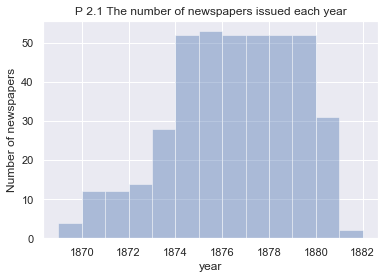

In [392]:
year = [int(i) for i in catalog['year']]
year_graph = sns.distplot(year, kde = False)
year_graph.set(xlabel='year', ylabel='Number of newspapers')
plt.title('P 2.1 The number of newspapers issued each year')
plt.show()

* The Spiritualist newspaper started from 1869 and the number of issued newspaper continues to go up before 1875, which came to a flourishing stage from 1874 to 1879. In 1880s, the number of issued newspaper started to shrink and the newspaper came to an end in 1882.

#### 2) The Appearance Frequency of Different Type of Entities according to Time

In [104]:
# Use the NER module in spacy to get the entities
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

Because processing all of the data is too time-consuming, I decided to use systematic sampling to analyze one newspaper every 40 of them.

In [199]:
docs = []
items = []
n = 0
for i in range(11):
    doc = nlp(catalog['doc_clean'][n])
    docs.append(doc)
    items.append([(x.text, x.label_, catalog['year'][n]) for x in doc.ents])
    n += 40

In [348]:
Counter(items[i]).most_common(8)

[(('london', 'GPE', ' 1880'), 37),
 (('33', 'CARDINAL', ' 1880'), 16),
 (('five', 'CARDINAL', ' 1880'), 9),
 (('three', 'CARDINAL', ' 1880'), 9),
 (('11', 'CARDINAL', ' 1880'), 7),
 (('april 30 1880', 'DATE', ' 1880'), 6),
 (('christian', 'NORP', ' 1880'), 6),
 (('john king', 'PERSON', ' 1880'), 6)]

As you can see, there are numbers, dates, percents and some types of entities which have little value, so I'm going to remove these.

In [204]:
# clean the entities

items_clean = []
items_final = []
for i in range(11):
    for n in range(len(items[i])):        
        if items[i][n][1] != 'CARDINAL' and items[i][n][1] !='ORDINAL' and items[i][n][1] != 'PERCENT':
            if items[i][n][1] != 'DATE' and items[i][n][1] !='TIME':
            #print(items[i][n])
                if len(items[i][n]) > 2:
                    items_clean.append(items[i][n])
    items_final.append(items_clean)
    items_clean = []

In [207]:
# count the entities

most_common_ent = [Counter(items_final[i]).most_common(8) for i in range(11)]
ent = [most_common_ent[i][k][0][0] for i in range(11) for k in range(8)]
typ = [most_common_ent[i][k][0][1] for i in range(11) for k in range(8)]
year = [most_common_ent[i][k][0][2] for i in range(11) for k in range(8)]
appear_time = [most_common_ent[i][k][1] for i in range(11) for k in range(8)]
ent_d = {'entity': ent, 'type' : typ, 'appear_time' : appear_time, 'year': year}

ent_df = pd.DataFrame(ent_d)
ent_df.head()

,appear_time,entity,type,year
0,25,london,GPE,1869
1,8,american,NORP,1869
2,8,new york,GPE,1869
3,8,coleman,PERSON,1869
4,7,de morgan,PERSON,1869


There are four variables in here, so I choose the scatterplot with hues and continuous sizes to visualize this outcome.

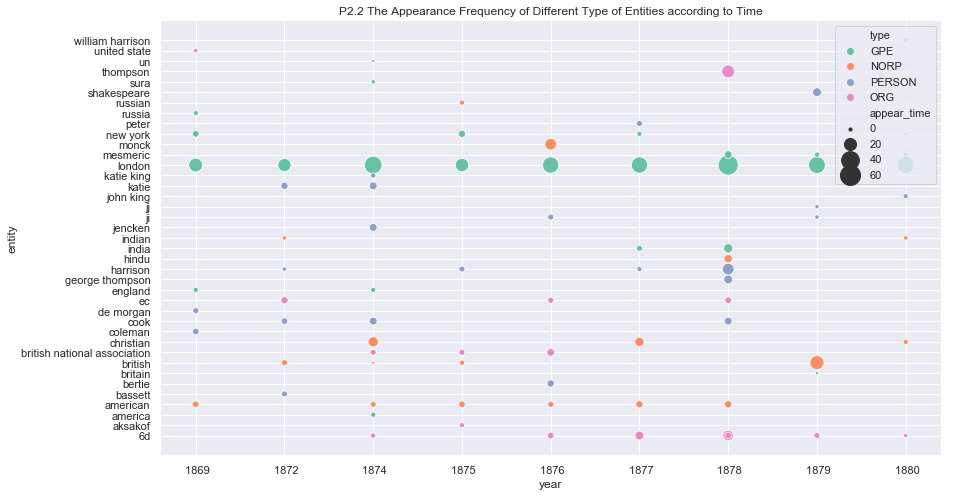

In [393]:
sns.set()
plt.figure(figsize=(14, 8))
# Load the example iris dataset
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="year", y="entity",
                     hue = 'type', size="appear_time",
                     palette="Set2", sizes=(10, 400),
                     data=ent_df)
plt.title('P2.2 The Appearance Frequency of Different Type of Entities according to Time')
plt.legend(loc='upper right')

* From this graph, we can get a rough idea about the frequency of entities in the newspaper from 1869 to 1880.
* For example, as for location, London was always referred most. Apart from London, New York, India, and Russia is also referred in the newspaper in certain period.
* The most appeared names changed in different period. In early 1970s, they are Coleman, De Morgan and Katie King. Later, Harrison, George Thompson and Cook began to to show greater weight in this newspaper.
* There are some messy words due to the OCR mistakes, which can be ignored for now. 

#### 3) The Appearance Frequency of Location according to Time

In [426]:
most_common_ent = [Counter(items_final[i]).most_common(30) for i in range(11)]

ent = [most_common_ent[i][k][0][0] for i in range(11) for k in range(30)]
typ = [most_common_ent[i][k][0][1] for i in range(11) for k in range(30)]
year = [most_common_ent[i][k][0][2] for i in range(11) for k in range(30)]
appear_time = [most_common_ent[i][k][1] for i in range(11) for k in range(30)]
ent_d = {'entity': ent, 'type' : typ, 'appear_time' : appear_time, 'year': year}

ent_df = pd.DataFrame(ent_d)

GPE = [(i[k][0]) for i in items for k in range(len(i)) if i[k][1] == 'GPE']
GPE_df = ent_df.loc[ent_df['type'] == 'GPE']
GPE_df.head()

#count_GPE = [Counter(GPE[i]).most_common(20) for i in range(11)]

,appear_time,entity,type,year
0,25,london,GPE,1869
2,8,new york,GPE,1869
5,6,england,GPE,1869
6,6,russia,GPE,1869
13,4,america,GPE,1869


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'P2.3 The Appearance Frequency of Location according to Time')

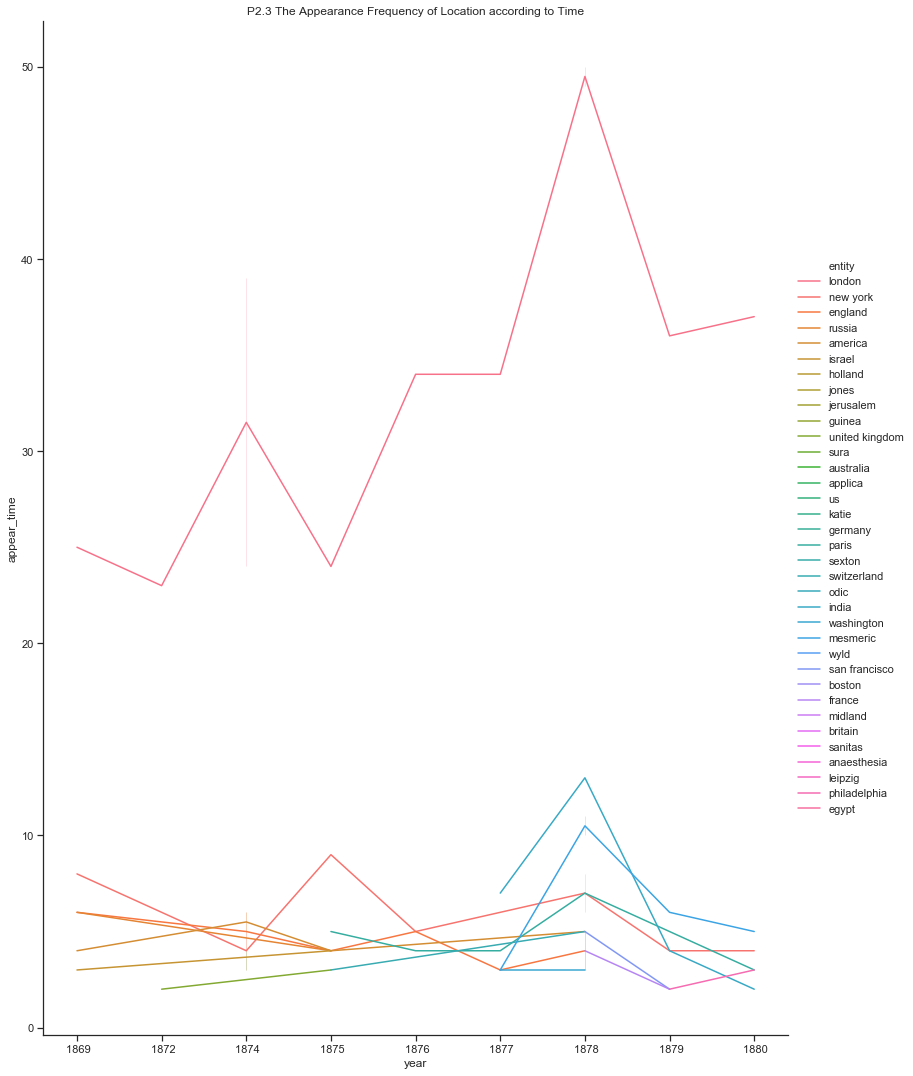

In [440]:
sns.set(style="ticks")

sns.relplot(x="year", y="appear_time",
            hue="entity",         
            height=15, aspect=.75, facet_kws=dict(sharex=False),
            kind="line",legend='brief', data=GPE_df)
plt.title('P2.3 The Appearance Frequency of Location according to Time')

* This graph shows the the appearance frequency of location from 1869 to 1880. 

#### 4) Word Cloud of Noun

At first, I tried to calculate all the frequently appeared word, which didn't work well. So I chose to show only noun words.

In [442]:
list_of_word = []
list_word = []

for i in range(11):
    for x in docs[i]:
        list_word.append((x.orth_,x.pos_, x.lemma_,))
    list_of_word.append(list_word)

noun = [[i[2] for i in list_of_word[k] if i[1] == 'NOUN'] for k in range(11)]
count_noun = [pd.DataFrame(Counter(noun[i]).most_common(20)) for i in range(11)]
count_noun[1].head()

,0,1
0,man,504
1,spirit,386
2,hand,385
3,life,349
4,fact,333


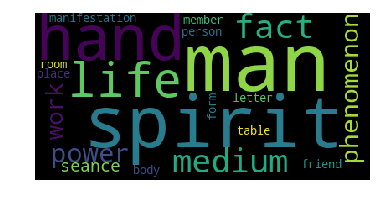

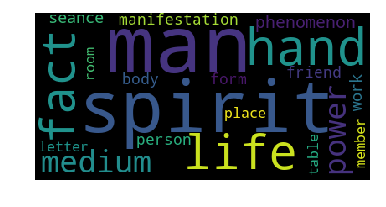

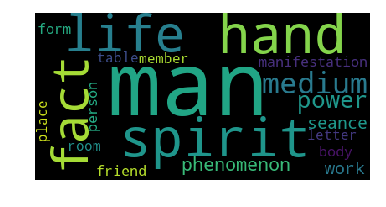

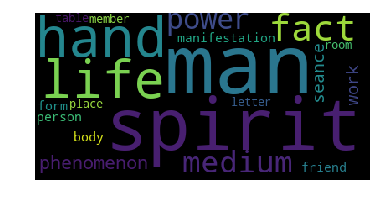

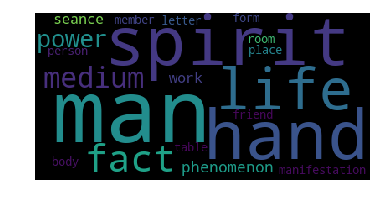

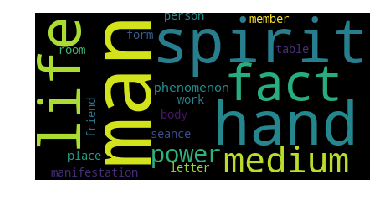

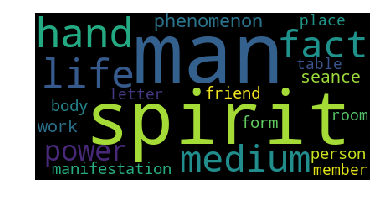

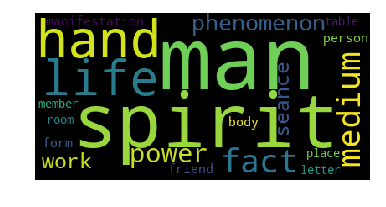

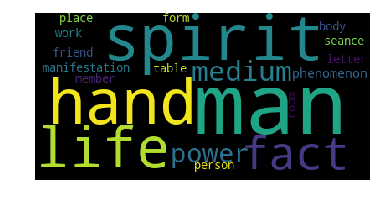

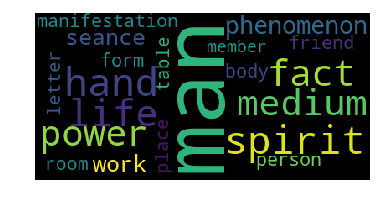

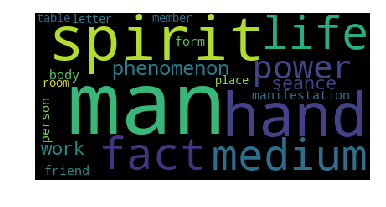

In [385]:
# Generate a word cloud image
from wordcloud import WordCloud

for i in range(11):
    segList=count_noun[i].values.tolist()
    segTuple=tuple(segList[:100])
    segDict ={k:v*1.0 for k,v in segTuple }
    #segDict 
    wordcloud = WordCloud().fit_words(segDict)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

plt.close()


* Man, spirit, hand, life and medium always appeared frequently in the text.

## Reflect and Hypothesise

A 200 word reflection on the data
3-5 hypotheses with an explanation of:
What your hypothesis is
why you think that (referring to your graphs)
How you could go about testing it (note that this may include: further studies, asking the data owner, using some advanced algorithms, checking each data point individually, etc..)

#### Reflection
At first, I had no idea how to deal with such large amount of textual data. Thanks to our tutor Alex and Dave, they gave us some suggestions and introduced the NLP tools to us. Dealing with textual data is much more difficult than numerical data. From cleaning to analyzing, there are different libraries. I found pleasure in learning new things.

#### Hypotheses:
* In P2.2, we can know that people's names appeared in the newspaper a lot. It would be interesting to do some research about the characters in the newspaper, which may tell us the leading figure in the Spiritualism in different period and their standpoint.

* The data shown in P2.3 can be illustrated better in an interactive world map. I want to make a interactive map to show the development of Spiritualism in different location according to time.

* In P2.4, there are too many words, which are difficult for us to know the exact meaning. I think we can have a look of the frequently-appeared words in the text to find out the scenerios.